# Load and plot RMSE's

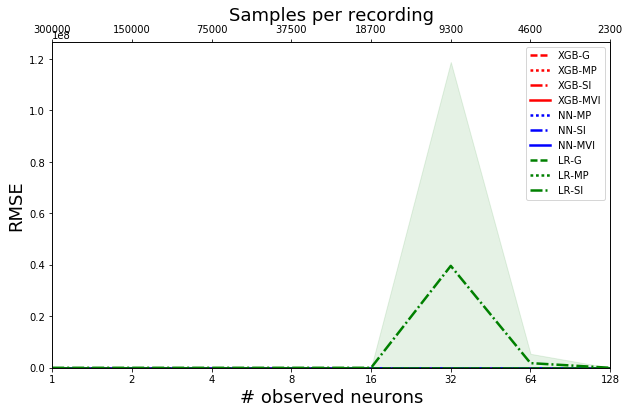

In [84]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle
import os.path

x = [2**x for x in range(8)]
x = range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


#networks =['NN']
network='NN'
nRecordings =10
#methods =['XGB', 'XGBMP', 'XGBMVI', 'XGBSI', 'NNMP', 'NNMVI', 'NNSI']
methods = ['XGB', 'NN', 'LR']
imputationMethods = ['', 'MP', 'SI', 'MVI']
imputationMethodLs = ['G', 'MP', 'SI', 'MVI']
#methodLabels =['XGB-G', 'XGB-MP', 'XGB-MVI', 'XGB-SI','NN-MP', 'NN-MVI', 'NN-SI']

markers = ['.', 'x', 'o', '>']
lstyles =[ '--', ':', '-.','-' ]
colors =['r', 'b', 'g', 'm', 'c']
iLayer=0 
figName = 'figures/Figure 1-Layer ' + str(iLayer)

for iMethod in range(len(methods)):
    for iImputation in range(len(imputationMethods)):
        #for iLayer in range(0,len(layers), 2):
        curMethod=methods[iMethod]+imputationMethods[iImputation]
        fName = 'results/' + curMethod + '_RMSES_Layer' + str(iLayer) + 'nRec' + \
                str(nRecordings) + network + '.dat'
            
        if os.path.exists(fName):
           
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
#             ax1.plot(x, y, label=methods[iMethod]+'-'+imputationMethodLs[iImputation]+', Layer '+ str(iLayer+1) , linewidth=2.5,\
#                      markersize ='10',linestyle=lstyles[iImputation],color=colors[iMethod])#\
            ax1.plot(x, y, label=methods[iMethod]+'-'+imputationMethodLs[iImputation] , linewidth=2.5,\
                     markersize ='10',linestyle=lstyles[iImputation],color=colors[iMethod])#\
                     #color=colors[iMethod], marker = markers[iImputation])#linestyle=lstyles[iImputation])
            pl.fill_between(x, y-error, y+error, alpha=0.1, color  = colors[iMethod] )


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=18)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(8)])
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

ax2.set_xticklabels(nSamples)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
ax1.set_ylim([0, yl[1]])
#ax1.set_ylim([0, .5])

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


In [38]:
iLayer=2
fName = 'results/softImpute_XGB_RMSES_Layer' + str(iLayer) + '_nRec1' + \
                '_'+networks[iNetwork] + '.dat'
with open(fName,'rb') as f:
        rmses = pickle.load(f)        
f.close()

rmses.shape
rmses_tmp = np.zeros([5, 10, 8])
for it in range(5):
    rmses_tmp[it, :, :] = rmses[:, it, :, 0]
rmses =rmses_tmp

fName2 = 'results/' + 'XGBSI' + '_RMSES_Layer' + str(iLayer) + 'nRec' + \
                str(nRecordings) + networks[iNetwork] + '.dat'
    
with open(fName2, 'w') as f:
    pickle.dump(rmses, f)
    f.close()

In [66]:
iLayer=2
fName = 'results/softImpute_XGB_RMSES_Layer' + str(iLayer) + '_nRec1' + \
                '_'+networks[iNetwork] + '.dat'
with open(fName,'rb') as f:
        rmses = pickle.load(f)        
f.close()